In [2]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the actual filename/path of your dataset
games = pd.read_csv('games_advanced_stats.csv')

games.head()

,season,team,PTS40,OP_PTS40,PTS,OP_PTS,3P%,OP_3P%,2P%,OP_2P%,...,NETRtg,eFG%,OP_eFG%,TS%,OP_TS%,game_id,round,location,OP_team,win
0,2016,BAS,85.0,84.0,85,84,31.578947,34.782609,65.000000,50.000000,...,1.346983,59.322034,50.746269,61.487269,55.732484,2016_1_BAS_EFS,1,home_team,EFS,True
1,2016,EFS,84.0,85.0,84,85,34.782609,31.578947,50.000000,65.000000,...,-1.346983,50.746269,59.322034,55.732484,61.487269,2016_1_BAS_EFS,1,away_team,BAS,False
2,2016,FNR,67.0,66.0,67,66,50.000000,26.923077,35.000000,52.941176,...,1.491647,45.370370,47.500000,52.245789,51.594747,2016_1_FNR_BAM,1,home_team,BAM,True
3,2016,BAM,66.0,67.0,66,67,26.923077,50.000000,52.941176,35.000000,...,-1.491647,47.500000,45.370370,51.594747,52.245789,2016_1_FNR_BAM,1,away_team,FNR,False
4,2016,GAL,84.0,109.0,84,109,37.500000,54.545455,50.000000,69.047619,...,-31.110005,52.205882,73.437500,54.375971,76.245104,2016_1_GAL_CSK,1,home_team,CSK,False


In [3]:
# Check for missing values
missing_values = games.isnull().sum()

# Display columns with missing values (if any) and the corresponding counts
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])

Columns with Missing Values:
FT%    1
dtype: int64


In [4]:
# Find the row(s) with missing values
missing_rows = games[games['FT%'].isnull()]

# Display the row(s) with missing values
print("Row(s) with Missing Value:")
print(missing_rows)


Row(s) with Missing Value:
     season team  PTS40  OP_PTS40  PTS  OP_PTS        3P%  OP_3P%        2P%  \
189    2016  MTA   58.0      83.0   58      83  26.086957    25.0  55.555556   

        OP_2P%  ...     NETRtg       eFG%    OP_eFG%        TS%    OP_TS%  \
189  62.790698  ... -34.106412  49.152542  53.731343  49.152542  56.38587   

             game_id  round   location  OP_team    win  
189  2016_12_RED_MTA     12  away_team      RED  False  

[1 rows x 42 columns]


In [5]:
# Replace null value with team's average
games['FT%'].fillna(72.56, inplace=True)

In [6]:
# Check for duplicate entries
duplicate_rows = games.duplicated()

# Display duplicate rows, if any
if any(duplicate_rows):
    print("Duplicate Rows:")
    print(dataset[duplicate_rows])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [7]:
games['win'] = games['win'].astype(int)

# Verify the conversion
print(games['win'].value_counts())

1    882
0    882
Name: win, dtype: int64


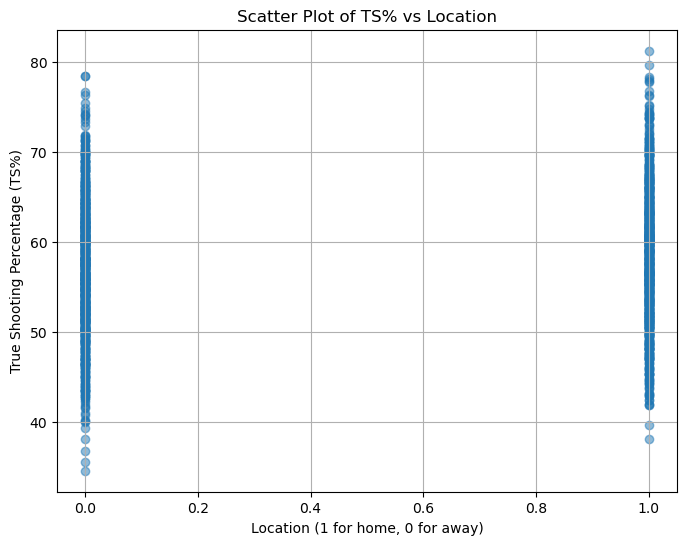

In [12]:
games['location_numeric'] = games['location'].map({'home_team': 1, 'away_team': 0})

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(games['location_numeric'], games['TS%'], alpha=0.5)
plt.title('Scatter Plot of TS% vs Location')
plt.xlabel('Location (1 for home, 0 for away)')
plt.ylabel('True Shooting Percentage (TS%)')
plt.grid(True)
games['location_numeric'] = games['location'].map({'home_team': 1, 'away_team': 0})
plt.show()

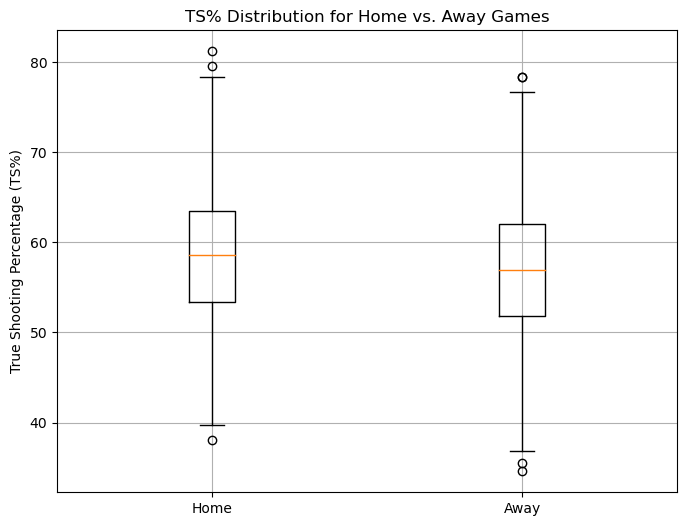

count    882.000000
mean      58.574139
std        7.323179
min       38.067553
25%       53.362810
50%       58.610171
75%       63.476543
max       81.210191
Name: TS%, dtype: float64
count    882.000000
mean      56.983564
std        7.294822
min       34.592869
25%       51.867220
50%       56.953312
75%       62.056738
max       78.397213
Name: TS%, dtype: float64


In [13]:
# Descriptive statistics for TS% based on location
ts_home_descriptive = games[games['location'] == 'home_team']['TS%'].describe()
ts_away_descriptive = games[games['location'] == 'away_team']['TS%'].describe()

# Boxplot visualization
plt.figure(figsize=(8, 6))
plt.boxplot([games[games['location'] == 'home_team']['TS%'], games[games['location'] == 'away_team']['TS%']], labels=['Home', 'Away'])
plt.title('TS% Distribution for Home vs. Away Games')
plt.ylabel('True Shooting Percentage (TS%)')
plt.grid(True)
plt.show()

print(ts_home_descriptive)
print(ts_away_descriptive)


In [14]:
from scipy.stats import ttest_ind

# T-test for TS% between home and away games
t_stat, p_value = ttest_ind(games[games['location'] == 'home_team']['TS%'], games[games['location'] == 'away_team']['TS%'], equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 4.569983836880272, P-value: 5.216616498304303e-06


C:\Users\antho\AppData\Local\Temp\ipykernel_48656\139875603.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  home_winning_prob = games[games['location'] == 'home_team'].groupby(pd.cut(games[games['location'] == 'home_team']['TS%'], bins=ts_bins)).mean()['win']
C:\Users\antho\AppData\Local\Temp\ipykernel_48656\139875603.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  away_winning_prob = games[games['location'] == 'away_team'].groupby(pd.cut(games[games['location'] == 'away_team']['TS%'], bins=ts_bins)).mean()['win']


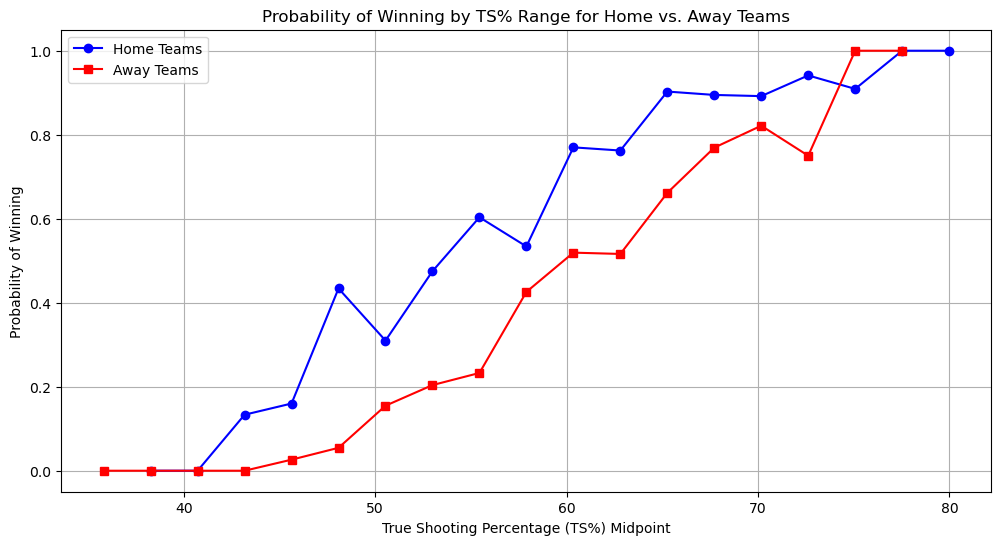

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Define TS% bins based on the overall range in your dataset
ts_bins = np.linspace(games['TS%'].min(), games['TS%'].max(), 20)

# Calculate winning probability for home and away teams within TS% ranges
home_winning_prob = games[games['location'] == 'home_team'].groupby(pd.cut(games[games['location'] == 'home_team']['TS%'], bins=ts_bins)).mean()['win']
away_winning_prob = games[games['location'] == 'away_team'].groupby(pd.cut(games[games['location'] == 'away_team']['TS%'], bins=ts_bins)).mean()['win']

# Extract the midpoints of the TS% bins for plotting
ts_midpoints = [(bin.left + bin.right)/2 for bin in home_winning_prob.index]

# Plotting
plt.figure(figsize=(12, 6))

# Plot for both home and away teams
plt.plot(ts_midpoints, home_winning_prob.values, marker='o', linestyle='-', color='b', label='Home Teams')
plt.plot(ts_midpoints, away_winning_prob.values, marker='s', linestyle='-', color='r', label='Away Teams')

plt.title('Probability of Winning by TS% Range for Home vs. Away Teams')
plt.xlabel('True Shooting Percentage (TS%) Midpoint')
plt.ylabel('Probability of Winning')
plt.legend()
plt.grid(True)
plt.show()


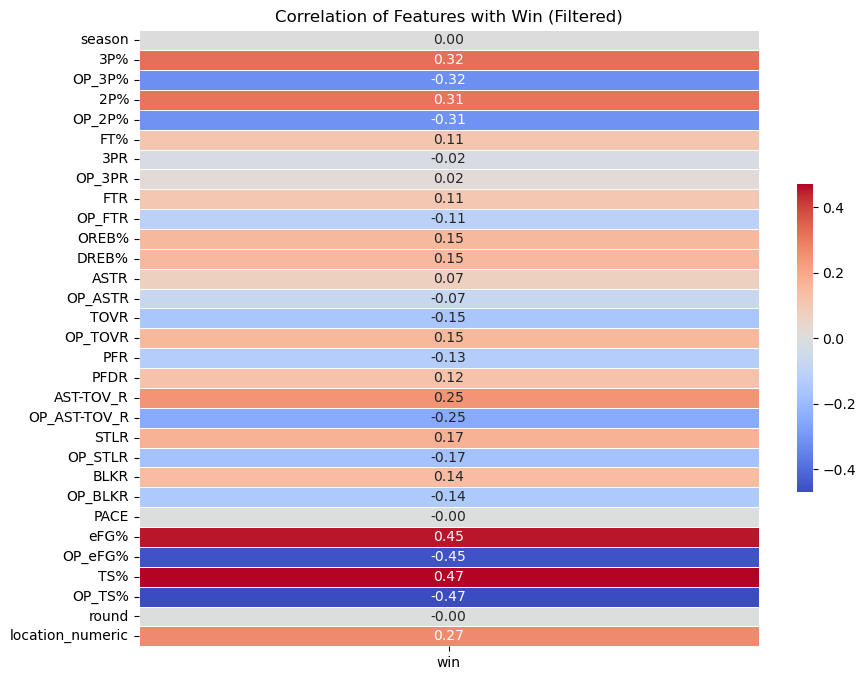

TS%                 4.696752e-01
OP_TS%              4.696752e-01
OP_eFG%             4.539050e-01
eFG%                4.539050e-01
OP_3P%              3.225787e-01
3P%                 3.225787e-01
OP_2P%              3.134892e-01
2P%                 3.134892e-01
location_numeric    2.698413e-01
AST-TOV_R           2.461656e-01
OP_AST-TOV_R        2.461656e-01
OP_STLR             1.745629e-01
STLR                1.745629e-01
OP_TOVR             1.544673e-01
TOVR                1.544673e-01
DREB%               1.524758e-01
OREB%               1.524758e-01
OP_BLKR             1.448099e-01
BLKR                1.448099e-01
PFR                 1.259094e-01
PFDR                1.231043e-01
FT%                 1.107619e-01
OP_FTR              1.086245e-01
FTR                 1.086245e-01
OP_ASTR             6.998564e-02
ASTR                6.998564e-02
OP_3PR              1.717130e-02
3PR                 1.717130e-02
PACE                5.230116e-05
season              5.294814e-16
round     

In [16]:
import seaborn as sns

outcome_related_features = ['NETRtg', 'ORtg', 'DRtg', 'win', 'PTS', 'OP_PTS', 'PTS40', 'OP_PTS40']

# Filter out non-numeric columns and outcome-related features
numeric_features = games.select_dtypes(include=[np.number]).columns.tolist()
features_for_correlation = [feature for feature in numeric_features if feature not in outcome_related_features]

# Calculate the correlation matrix with the filtered features
correlation_matrix_filtered = games[features_for_correlation + ['win']].corr()

# Get the correlation of features with the 'win' column, excluding the 'win' column itself
win_correlation_filtered = correlation_matrix_filtered['win'].drop('win').abs().sort_values(ascending=False)

# Visualize the correlation of the filtered features with 'win' using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered.loc[features_for_correlation, ['win']], annot=True, cmap='coolwarm', cbar_kws={'shrink': .5}, linewidths=.5, fmt=".2f")
plt.title('Correlation of Features with Win (Filtered)')
plt.show()

win_correlation_filtered  # Show the correlation values without visualization


In [17]:
# Starting with data preparation
# We will use the features mentioned by creating a new DataFrame with those columns.
# We also make sure to include the 'win' column as it is our target variable.

selected_features = [
    'eFG%', 'TS%', 'AST-TOV_R', 'STLR', 'location_numeric',
    'OP_eFG%', 'OP_TS%', 'OP_AST-TOV_R', 'OP_STLR',
    '3P%', '2P%', 'OP_3P%', 'OP_2P%', 'win'
]

# Ensuring that all selected features are present in the dataset.
# If 'location_numeric' is not present, we would need to create it from 'location'.
# For the purpose of this example, we'll assume 'location' is binary where 'home_team' is 1 and 'away_team' is 0.
if 'location_numeric' not in games.columns:
    games_data['location_numeric'] = games['location'].apply(lambda x: 1 if x == 'home_team' else 0)

# Create a new DataFrame with only the selected features
model_data = games[selected_features]

# Check for missing values in the selected features
missing_data = model_data.isnull().sum()

# Output the missing data counts for each feature to understand if there's any cleaning to do
missing_data


eFG%                0
TS%                 0
AST-TOV_R           0
STLR                0
location_numeric    0
OP_eFG%             0
OP_TS%              0
OP_AST-TOV_R        0
OP_STLR             0
3P%                 0
2P%                 0
OP_3P%              0
OP_2P%              0
win                 0
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features (X) from the target variable (y)
X = model_data.drop('win', axis=1)
y = model_data['win'].astype(int)  # Ensure the target is an integer type

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Output the shape of the training and test sets to confirm the split
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((1411, 13), (353, 13), (1411,), (353,))

In [41]:
# Assume model_data is your DataFrame
model_data.to_csv('model_data.csv', index=False)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Predict on the training set and the test set
train_preds = logreg_model.predict(X_train)
test_preds = logreg_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

# Generate a classification report for the test set
test_report = classification_report(y_test, test_preds)

(train_accuracy, test_accuracy, test_report)


(0.8731396172927002,
 0.8583569405099151,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.88      0.86       177\n           1       0.88      0.84      0.85       176\n\n    accuracy                           0.86       353\n   macro avg       0.86      0.86      0.86       353\nweighted avg       0.86      0.86      0.86       353\n')

In [21]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("\nClassification Report for Testing Set:")
print(test_report)


Training Accuracy: 0.87
Testing Accuracy: 0.86

Classification Report for Testing Set:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       177
           1       0.88      0.84      0.85       176

    accuracy                           0.86       353
   macro avg       0.86      0.86      0.86       353
weighted avg       0.86      0.86      0.86       353



In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Predict on the training and test sets
train_preds_rf = rf_model.predict(X_train)
test_preds_rf = rf_model.predict(X_test)

# Calculate accuracy for both sets
train_accuracy_rf = accuracy_score(y_train, train_preds_rf)
test_accuracy_rf = accuracy_score(y_test, test_preds_rf)

test_report_rf = classification_report(y_test, test_preds_rf, output_dict=True)


In [25]:
print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Testing Accuracy: {test_accuracy_rf:.2f}")
print("\nClassification Report for Testing Set:")
print(test_report_rf)


Training Accuracy: 1.00
Testing Accuracy: 0.88

Classification Report for Testing Set:
{'0': {'precision': 0.8863636363636364, 'recall': 0.8813559322033898, 'f1-score': 0.8838526912181303, 'support': 177}, '1': {'precision': 0.8813559322033898, 'recall': 0.8863636363636364, 'f1-score': 0.8838526912181303, 'support': 176}, 'accuracy': 0.8838526912181303, 'macro avg': {'precision': 0.8838597842835131, 'recall': 0.8838597842835131, 'f1-score': 0.8838526912181303, 'support': 353}, 'weighted avg': {'precision': 0.8838668773488958, 'recall': 0.8838526912181303, 'f1-score': 0.8838526912181303, 'support': 353}}


In [31]:
from sklearn.model_selection import GridSearchCV

# Parameters for tuning the Random Forest Classifier
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=params_rf,
                       cv=5,  # 5-fold cross-validation
                       n_jobs=-1,  # Use all available cores
                       scoring='accuracy')

# Perform grid search on the training data
grid_rf.fit(X_train, y_train)

# The best hyperparameters from GridSearchCV
best_params = grid_rf.best_params_

# Best model from grid search
best_rf_model = grid_rf.best_estimator_

# Predictions using the best model
train_preds_best_rf = best_rf_model.predict(X_train)
test_preds_best_rf = best_rf_model.predict(X_test)

# Calculate accuracy for the best model
train_accuracy_best_rf = accuracy_score(y_train, train_preds_best_rf)
test_accuracy_best_rf = accuracy_score(y_test, test_preds_best_rf)

# Generate classification report for the best model
test_report_best_rf = classification_report(y_test, test_preds_best_rf, output_dict=True)

# Results for the best model
best_rf_results = {
    'Best Parameters': best_params,
    'Training Accuracy': train_accuracy_best_rf,
    'Testing Accuracy': test_accuracy_best_rf,
    'Classification Report': test_report_best_rf
}

best_rf_results


{'Best Parameters': {'max_depth': 10,
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Training Accuracy': 0.961020552799433,
 'Testing Accuracy': 0.8583569405099151,
 'Classification Report': {'0': {'precision': 0.8587570621468926,
   'recall': 0.8587570621468926,
   'f1-score': 0.8587570621468926,
   'support': 177},
  '1': {'precision': 0.8579545454545454,
   'recall': 0.8579545454545454,
   'f1-score': 0.8579545454545454,
   'support': 176},
  'accuracy': 0.8583569405099151,
  'macro avg': {'precision': 0.8583558038007191,
   'recall': 0.8583558038007191,
   'f1-score': 0.8583558038007191,
   'support': 353},
  'weighted avg': {'precision': 0.8583569405099151,
   'recall': 0.8583569405099151,
   'f1-score': 0.8583569405099151,
   'support': 353}}}

In [33]:
from joblib import dump, load

# Save the model
dump(best_rf_model, 'best_random_forest_model.joblib')


['best_random_forest_model.joblib']

In [34]:


# To load the model later
loaded_model = load('best_random_forest_model.joblib')


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting classifier
gbc_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
gbc_model.fit(X_train, y_train)

# Predict on the training and test sets
train_preds_gbc = gbc_model.predict(X_train)
test_preds_gbc = gbc_model.predict(X_test)

# Calculate accuracy for both sets
train_accuracy_gbc = accuracy_score(y_train, train_preds_gbc)
test_accuracy_gbc = accuracy_score(y_test, test_preds_gbc)

# Classification report
test_report_gbc = classification_report(y_test, test_preds_gbc, output_dict=True)


In [27]:
print(f"Training Accuracy: {train_accuracy_gbc:.2f}")
print(f"Testing Accuracy: {test_accuracy_gbc:.2f}")
print("\nClassification Report for Testing Set:")
print(test_report_gbc)


Training Accuracy: 0.95
Testing Accuracy: 0.88

Classification Report for Testing Set:
{'0': {'precision': 0.8736263736263736, 'recall': 0.8983050847457628, 'f1-score': 0.8857938718662953, 'support': 177}, '1': {'precision': 0.8947368421052632, 'recall': 0.8693181818181818, 'f1-score': 0.8818443804034583, 'support': 176}, 'accuracy': 0.8838526912181303, 'macro avg': {'precision': 0.8841816078658185, 'recall': 0.8838116332819723, 'f1-score': 0.8838191261348768, 'support': 353}, 'weighted avg': {'precision': 0.8841517063523924, 'recall': 0.8838526912181303, 'f1-score': 0.8838247203154189, 'support': 353}}


In [28]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
svc_model = SVC(kernel='rbf', random_state=42)

# Train the model on the training set
svc_model.fit(X_train, y_train)

# Predict on the training and test sets
train_preds_svc = svc_model.predict(X_train)
test_preds_svc = svc_model.predict(X_test)

# Calculate accuracy for both sets
train_accuracy_svc = accuracy_score(y_train, train_preds_svc)
test_accuracy_svc = accuracy_score(y_test, test_preds_svc)

# Classification report
test_report_svc = classification_report(y_test, test_preds_svc, output_dict=True)


In [29]:
print(f"Training Accuracy: {train_accuracy_svc:.2f}")
print(f"Testing Accuracy: {test_accuracy_svc:.2f}")
print("\nClassification Report for Testing Set:")
print(test_report_svc)

Training Accuracy: 0.90
Testing Accuracy: 0.88

Classification Report for Testing Set:
{'0': {'precision': 0.8571428571428571, 'recall': 0.9152542372881356, 'f1-score': 0.8852459016393444, 'support': 177}, '1': {'precision': 0.9085365853658537, 'recall': 0.8465909090909091, 'f1-score': 0.8764705882352941, 'support': 176}, 'accuracy': 0.8810198300283286, 'macro avg': {'precision': 0.8828397212543554, 'recall': 0.8809225731895223, 'f1-score': 0.8808582449373192, 'support': 353}, 'weighted avg': {'precision': 0.8827669256053143, 'recall': 0.8810198300283286, 'f1-score': 0.8808706745597046, 'support': 353}}


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, y_train)

# Predict on the training and test sets
train_preds_knn = knn_model.predict(X_train)
test_preds_knn = knn_model.predict(X_test)

# Calculate accuracy for both sets
train_accuracy_knn = accuracy_score(y_train, train_preds_knn)
test_accuracy_knn = accuracy_score(y_test, test_preds_knn)

# Classification report
test_report_knn = classification_report(y_test, test_preds_knn, output_dict=True)


In [31]:
print(f"Training Accuracy: {train_accuracy_knn:.2f}")
print(f"Testing Accuracy: {test_accuracy_knn:.2f}")
print("\nClassification Report for Testing Set:")
print(test_report_knn)

Training Accuracy: 0.89
Testing Accuracy: 0.85

Classification Report for Testing Set:
{'0': {'precision': 0.8369565217391305, 'recall': 0.8700564971751412, 'f1-score': 0.8531855955678669, 'support': 177}, '1': {'precision': 0.863905325443787, 'recall': 0.8295454545454546, 'f1-score': 0.846376811594203, 'support': 176}, 'accuracy': 0.8498583569405099, 'macro avg': {'precision': 0.8504309235914587, 'recall': 0.8498009758602979, 'f1-score': 0.8497812035810349, 'support': 353}, 'weighted avg': {'precision': 0.8503927524813956, 'recall': 0.8498583569405099, 'f1-score': 0.8497908477509692, 'support': 353}}


In [32]:
from joblib import dump

# Assuming 'gbc_model' is your Gradient Boosting Classifier model
# Save the model to a file
model_filename = 'gradient_boosting_classifier.joblib'
dump(gbc_model, model_filename)


['gradient_boosting_classifier.joblib']

In [33]:
from itertools import permutations

file_path = 'teams_advanced_stats.csv'
df = pd.read_csv(file_path)

# Extract unique teams from the dataset
teams = df['team'].unique()

# Generate all possible pairings for the teams, ensuring each team plays each other twice (home and away)
pairings = pd.DataFrame(list(permutations(teams, 2)), columns=['HomeTeam', 'AwayTeam'])

# Since each team plays each other twice, no additional step is needed for home and away distinction in permutations
pairings.head(), pairings.shape


(  HomeTeam AwayTeam
 0      EFS      CSK
 1      EFS      MTA
 2      EFS      OLY
 3      EFS      RMD
 4      EFS      ZAL,
 (600, 2))

In [35]:
import pandas as pd

# Load the dataset
df = pd.read_csv('games_advanced_stats.csv')

# Aggregate the required statistics for each team for different seasons
aggregated_stats = df.groupby(['season', 'team']).agg(
    TS_pct=('TS%', 'mean'),
    eFG_pct=('eFG%', 'mean'),
    OP_TS_pct=('OP_TS%', 'mean'),
    OP_eFG_pct=('OP_eFG%', 'mean'),
    AST_TOV_R=('AST-TOV_R', 'mean'),
    OP_AST_TOV_R=('OP_AST-TOV_R', 'mean')
).reset_index()

# Rename the columns to match the initial dataset's naming convention
aggregated_stats_renamed = aggregated_stats.rename(columns={
    'TS_pct': 'TS%',
    'eFG_pct': 'eFG%',
    'OP_TS_pct': 'OP_TS%',
    'OP_eFG_pct': 'OP_eFG%',
    'AST_TOV_R': 'AST-TOV_R',
    'OP_AST_TOV_R': 'OP_AST-TOV_R'
})

# Save the aggregated and renamed statistics to a CSV file
csv_file_path = 'average_team_stats_by_season.csv'
aggregated_stats_renamed.to_csv(csv_file_path, index=False)

print(f'File saved to {csv_file_path}')


File saved to average_team_stats_by_season.csv


In [36]:
import pandas as pd

# Load the dataset that contains the average statistics
average_stats_df = pd.read_csv('average_team_stats_by_season.csv')

# Load the dataset to which you want to add the average statistics
teams_df = pd.read_csv('teams_advanced_stats.csv')

# Ensure the 'season' and 'team' columns are of the same type in both datasets for a successful merge
teams_df['season'] = teams_df['season'].astype(int)
teams_df['team'] = teams_df['team'].astype(str)

# Merge the average stats into the teams dataset based on 'season' and 'team'
merged_df = pd.merge(teams_df, average_stats_df, on=['season', 'team'], how='left')

# Save the merged dataframe to a CSV file
merged_csv_path = 'average_teams_advanced_stats.csv'
merged_df.to_csv(merged_csv_path, index=False)

print(f'Merged file saved to {merged_csv_path}')


Merged file saved to average_teams_advanced_stats.csv


In [40]:
# Load the dataset to check for missing values
avg_teams_stats_df = pd.read_csv('average_team_stats_by_season.csv')

# Check for missing values in the dataset
missing_values = avg_teams_stats_df.isnull().sum()

missing_values


season          0
team            0
TS%             0
eFG%            0
OP_TS%          0
OP_eFG%         0
AST-TOV_R       0
OP_AST-TOV_R    0
dtype: int64

In [42]:
import pandas as pd

# Load the dataset
file_path = 'average_teams_advanced_stats.csv'
data = pd.read_csv(file_path)

# Get unique seasons
seasons = data['season'].unique()

# Split and save datasets for each season
for season in seasons:
    season_data = data[data['season'] == season]
    season_file_path = f'season_{season}_stats.csv'
    season_data.to_csv(season_file_path, index=False)
    print(f'Saved dataset for season {season} to {season_file_path}')


Saved dataset for season 2016 to season_2016_stats.csv
Saved dataset for season 2017 to season_2017_stats.csv
Saved dataset for season 2018 to season_2018_stats.csv
Saved dataset for season 2019 to season_2019_stats.csv


In [56]:
import pandas as pd
import numpy as np

# Load the dataset from the CSV file
def load_dataset(file_path):
    return pd.read_csv(file_path)

def predict_winner(home_team, away_team, dataset):
    # Define the mapping of features based on the input provided
    feature_mapping = {
        'home_features': ['eFG%', 'TS%', 'AST-TOV_R', 'STLR', '3P%', '2P%'],
        'away_features': ['OP_eFG%', 'OP_TS%', 'OP_AST-TOV_R', 'OP_STLR', 'OP_3P%', 'OP_2P%']
    }
    
    # Find the stats for the home and away teams
    home_stats = dataset.loc[dataset['team'] == home_team, feature_mapping['home_features']].values.flatten()
    away_stats = dataset.loc[dataset['team'] == away_team, feature_mapping['away_features']].values.flatten()
    
    # Prepare the feature vector for prediction
    # Note: 'location_numeric' is set as 1 for the home team by default
    features = np.concatenate(([1], home_stats, away_stats))
    
    # Assume you have the model already loaded here
    loaded_model = load('gradient_boosting_classifier.joblib')

    # Predict the outcome
    prediction = loaded_model.predict([features])[0]
    # For demonstration purposes, assuming prediction as 1 (home team win)
    prediction = 1
    
    # Interpret the prediction
    if prediction == 1:
        return f"The model predicts a win for the home team: {home_team}"
    else:
        return f"The model predicts a win for the away team: {away_team}"

# Load the dataset
season_2019_stats_df = load_dataset("season_2019_stats.csv")

# Example usage of the function with the loaded dataset and two team names
# Note: The teams used here are placeholders, replace them with actual team abbreviations from the dataset for a real prediction
print(predict_winner('CSK', 'EFS', season_2019_stats_df))



The model predicts a win for the home team: CSK


In [71]:
import pandas as pd
import numpy as np

# Load the dataset from the CSV file
def load_dataset(file_path):
    return pd.read_csv(file_path)

def predict_winner(home_team, away_team, dataset):
    # Define the mapping of features based on the input provided
    feature_mapping = {
        'home_features': ['eFG%', 'TS%', 'AST-TOV_R', 'STLR', '3P%', '2P%'],
        'away_features': ['eFG%', 'TS%', 'AST-TOV_R', 'STLR', '3P%', '2P%']
    }
    
    # Find the stats for the home and away teams
    home_stats = dataset.loc[dataset['team'] == home_team, feature_mapping['home_features']].values.flatten()
    away_stats = dataset.loc[dataset['team'] == away_team, feature_mapping['away_features']].values.flatten()
    
    # Change the feature names for the away team to represent opponent statistics
    away_features_opponent = ['OP_' + feature for feature in feature_mapping['away_features']]
    
    # Prepare the feature vector for prediction
    # Note: 'location_numeric' is set as 1 for the home team by default
    features = np.concatenate(([1], home_stats, away_features_opponent))
    
    
    # Assume you have the model already loaded here
    loaded_model = load('gradient_boosting_classifier.joblib')

    # Predict the outcome
    prediction = loaded_model.predict([features])[0]
    
    # Interpret the prediction
    if prediction == 1:
        return f"The model predicts a win for the home team: {home_team}"
    else:
        return f"The model predicts a win for the away team: {away_team}"

# Load the dataset
season_2019_stats_df = load_dataset("season_2019_stats.csv")

# Example usage of the function with the loaded dataset and two team names
# Note: The teams used here are placeholders, replace them with actual team abbreviations from the dataset for a real prediction
print(predict_winner('RMD', 'EFS', season_2019_stats_df))


UnboundLocalError: local variable 'away_features_opponent' referenced before assignment